1 Abrindo arquivo e importando.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")


display(tabela)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902671,163,UNIVERSIDADE ESTÁCIO DE SÁ,Privada com fins lucrativos,Universidade,1518220,CIÊNCIA DE DADOS,Tecnológico,NaN,Educação a Distância,Em atividade,2589,2086,456,Ciência de dados,4300604,Alvorada,RS,SUL
902672,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1468267,MÚSICA,Licenciatura,Formação de professor de música,Educação a Distância,Em atividade,1700,3992,42,Formação de professor de música,2704302,Maceió,AL,NORDESTE
902673,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1185929,CIÊNCIAS CONTÁBEIS,Bacharelado,Ciências contábeis,Educação a Distância,Em atividade,4500,3260,138,Ciências contábeis,3554003,Tatuí,SP,SUDESTE
902674,298,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,97329,MARKETING,Tecnológico,NaN,Educação a Distância,Em atividade,6000,1700,158,Marketing,2601102,Araripina,PE,NORDESTE


2 - Filtrando "NOME_CURSO", "GRAU", "AREA_OCDE","MODALIDADE", "QT_VAGAS_AUTORIZADAS",

In [84]:
qtd_cursos = tabela[["AREA_OCDE", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "REGIAO"]).sum()

qtd_cursos_final = qtd_cursos.query('QT_VAGAS_AUTORIZADAS != 0')
display(qtd_cursos_final)

QT_VAGAS_AUTORIZADAS
AREA_OCDE     REGIAO                                 
Acústica      SUL                                  40
Administração CENTRO-OESTE                   19883231
              IGNORADO/EXTERIOR                160250
              NORDESTE                       46008597
              NORTE                          20338520
...                                               ...
Zootecnia     NORDESTE                           2985
              NORTE                              3296
              SUDESTE                           20596
              SUL                              149633
Ética         CENTRO-OESTE                         60

[1586 rows x 1 columns]

grafico

sudeste

In [85]:
df = pd.DataFrame(tabela)

regiao1 = df[df['REGIAO'] == 'SUDESTE']

cursos = regiao1[["AREA_OCDE", "MUNICIPIO","REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "MUNICIPIO", "REGIAO"]).sum()

cursos_ativossd = cursos.query("QT_VAGAS_AUTORIZADAS != 0")

display(cursos_ativossd)
cursos_ativossd.to_excel("cursos_ativossd.xlsx")

QT_VAGAS_AUTORIZADAS
AREA_OCDE     MUNICIPIO      REGIAO                       
Administração Abaeté         SUDESTE                 26350
              Abre Campo     SUDESTE                   714
              Adamantina     SUDESTE                185279
              Afonso Cláudio SUDESTE                 41608
              Aguaí          SUDESTE                 47519
...                                                    ...
Zootecnia     Uberaba        SUDESTE                  2365
              Uberlândia     SUDESTE                  1201
              Unaí           SUDESTE                    50
              Vila Velha     SUDESTE                    80
              Viçosa         SUDESTE                    80

[66659 rows x 1 columns]

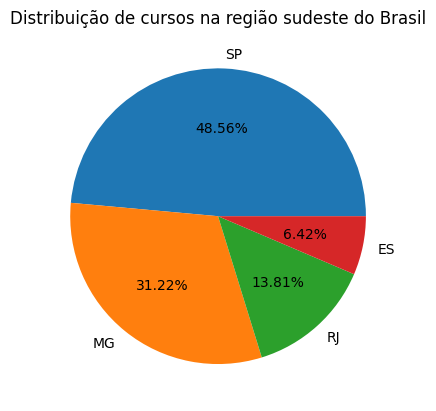

In [86]:
qnt_cursos_por_uf = regiao1['UF'].value_counts()

plt.title("Distribuição de cursos na região sudeste do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiaosd.png")
plt.show()

norte

In [87]:
df = pd.DataFrame(tabela)

regiao2 = df[df['REGIAO'] == 'NORTE']

cursos = regiao2[["AREA_OCDE", "MUNICIPIO","REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "MUNICIPIO", "REGIAO"]).sum()

cursos_ativosn = cursos.query("QT_VAGAS_AUTORIZADAS != 0")

display(cursos_ativosn)

cursos_ativosn.to_excel("cursos_ativosn.xlsx")

QT_VAGAS_AUTORIZADAS
AREA_OCDE     MUNICIPIO      REGIAO                      
Administração Abaetetuba     NORTE                 198376
              Acará          NORTE                  83520
              Acrelândia     NORTE                  73260
              Afuá           NORTE                 102520
              Alenquer       NORTE                  73274
...                                                   ...
Zootecnia     Redenção       NORTE                     60
              Santarém       NORTE                     40
              Sena Madureira NORTE                     40
              Vilhena        NORTE                     50
              Xinguara       NORTE                     80

[19954 rows x 1 columns]

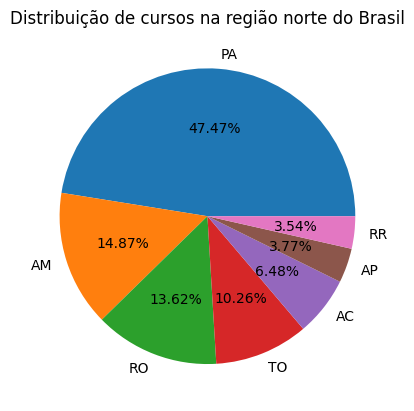

In [88]:
qnt_cursos_por_uf = regiao2['UF'].value_counts()

plt.title("Distribuição de cursos na região norte do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiaon.png")
plt.show()

nordeste

In [89]:
df = pd.DataFrame(tabela)

regiao3 = df[df['REGIAO'] == 'NORDESTE']

cursos = regiao3[["AREA_OCDE", "MUNICIPIO","REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "MUNICIPIO", "REGIAO"]).sum()

cursos_ativosnd = cursos.query("QT_VAGAS_AUTORIZADAS != 0")

display(cursos_ativosnd)

cursos_ativosnd.to_excel("cursos_ativosnd.xlsx")

QT_VAGAS_AUTORIZADAS
AREA_OCDE     MUNICIPIO                    REGIAO                        
Administração Abaré                        NORDESTE                 13956
              Abaíra                       NORDESTE                 54320
              Abreu e Lima                 NORDESTE                126276
              Acaraú                       NORDESTE                174225
              Acopiara                     NORDESTE                 87520
...                                                                   ...
Zootecnia     São Cristóvão                NORDESTE                    50
              São Luís                     NORDESTE                   120
              São Raimundo das Mangabeiras NORDESTE                    40
              Teresina                     NORDESTE                   150
              Timon                        NORDESTE                    80

[53714 rows x 1 columns]

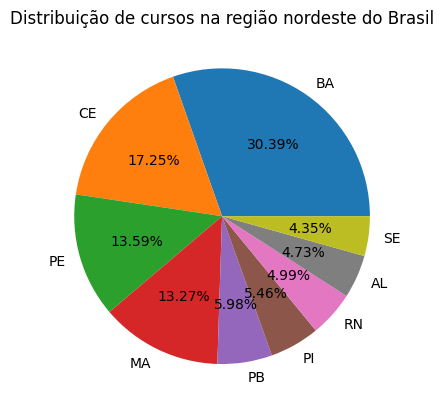

In [90]:
qnt_cursos_por_uf = regiao3['UF'].value_counts()

plt.title("Distribuição de cursos na região nordeste do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiaond.png")
plt.show()

sul

In [91]:
df = pd.DataFrame(tabela)

regiao4 = df[df['REGIAO'] == 'SUL']

cursos = regiao4[["AREA_OCDE", "MUNICIPIO","REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "MUNICIPIO", "REGIAO"]).sum()

cursos_ativoss = cursos.query("QT_VAGAS_AUTORIZADAS != 0")

display(cursos_ativoss)

cursos_ativoss.to_excel("cursos_ativoss.xlsx")

QT_VAGAS_AUTORIZADAS
AREA_OCDE     MUNICIPIO         REGIAO                      
Acústica      Santa Maria       SUL                       40
Administração Abatiá            SUL                     1000
              Abelardo Luz      SUL                    39196
              Aceguá            SUL                    20000
              Agrolândia        SUL                    23000
...                                                      ...
Zootecnia     Tuneiras do Oeste SUL                     1200
              Turvo             SUL                     1200
              Uruguaiana        SUL                       60
              Wenceslau Braz    SUL                     1200
              Xanxerê           SUL                       40

[44073 rows x 1 columns]

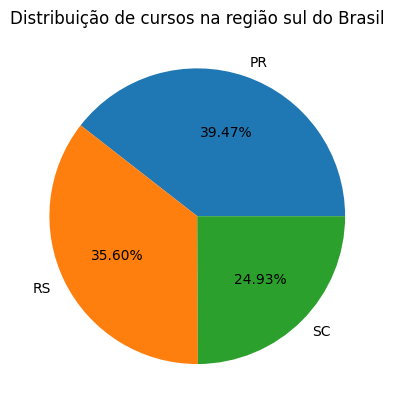

In [92]:
qnt_cursos_por_uf = regiao4['UF'].value_counts()

plt.title("Distribuição de cursos na região sul do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiaos.png")
plt.show()

centro-oeste

In [93]:
df = pd.DataFrame(tabela)

regiao5 = df[df['REGIAO'] == 'CENTRO-OESTE']

cursos = regiao5[["AREA_OCDE", "MUNICIPIO","REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["AREA_OCDE", "MUNICIPIO", "REGIAO"]).sum()

cursos_ativosco = cursos.query("QT_VAGAS_AUTORIZADAS != 0")

display(cursos_ativosco)

cursos_ativosco.to_excel("cursos_ativosco.xlsx")

QT_VAGAS_AUTORIZADAS
AREA_OCDE     MUNICIPIO                REGIAO                            
Administração Abadia de Goiás          CENTRO-OESTE                  1200
              Abadiânia                CENTRO-OESTE                 87216
              Acreúna                  CENTRO-OESTE                 93260
              Alcinópolis              CENTRO-OESTE                  3000
              Alexânia                 CENTRO-OESTE                144780
...                                                                   ...
Zootecnia     São Luís de Montes Belos CENTRO-OESTE                    60
              Trindade                 CENTRO-OESTE                   300
              Três Lagoas              CENTRO-OESTE                  1400
              Vila Rica                CENTRO-OESTE                    50
Ética         Anápolis                 CENTRO-OESTE                    60

[16833 rows x 1 columns]

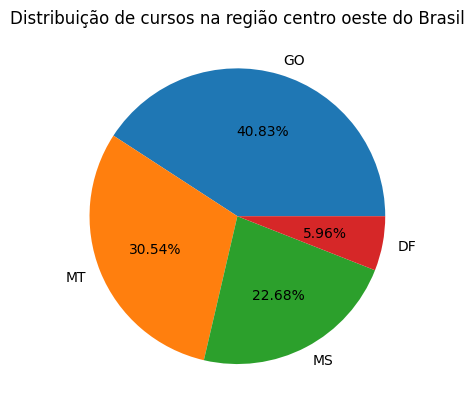

In [94]:
qnt_cursos_por_uf = regiao5['UF'].value_counts()

plt.title("Distribuição de cursos na região centro oeste do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiaoco.png")
plt.show()

Graficos

ValueError: 'explode' must be of length 'x'

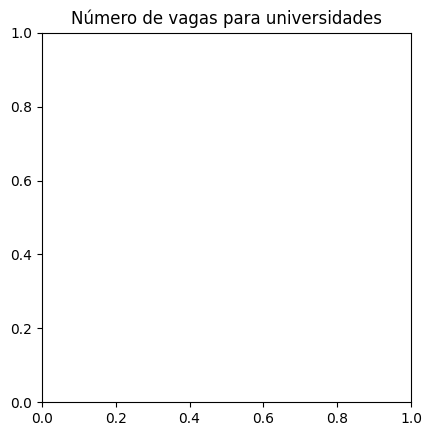

In [95]:
import matplotlib.pyplot as plt

arquivo2 = pd.read_excel("cursos_ativossd.xlsx")

tipo_facu = arquivo2['AREA_OCDE']
qtd_vagas = arquivo2['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas para universidades")

explode = (0, 0.3, 0.5)
cores = ['lightcoral', 'yellowgreen', 'lightskyblue']
plt.pie(qtd_vagas, explode=explode, colors=cores, startangle=30, autopct="%1.1f%%", radius=0.9)

legendas = plt.legend(tipo_facu, title="Tipos de faculdade" ,bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_01.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

4 cursos

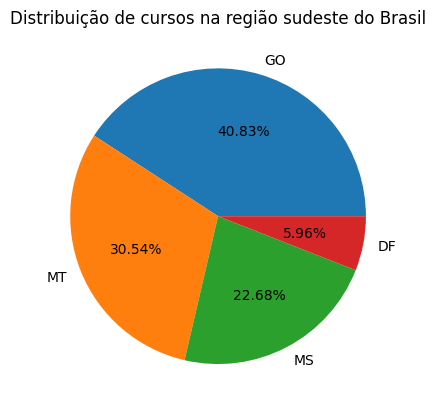

In [ ]:
qnt_cursos_por_uf = regiao['UF'].value_counts()

plt.title("Distribuição de cursos na região sudeste do Brasil")
plt.pie(qnt_cursos_por_uf, labels=qnt_cursos_por_uf.index, autopct="%1.2f%%")
plt.savefig("grafico_regiao.png")
plt.show()

Quantidade de instituição por regiao

In [ ]:
categoria_counts = tabela['NOME_CURSO'].value_counts()

print("Contagem de Cursos por Categoria nome do curso:")
print(categoria_counts)

Contagem de Cursos por Categoria nome do curso:
NOME_CURSO
ADMINISTRAÇÃO                                                       22997
PEDAGOGIA                                                           22587
EDUCAÇÃO FÍSICA                                                     18852
CIÊNCIAS CONTÁBEIS                                                  17545
GESTÃO DE RECURSOS HUMANOS                                          16328
                                                                    ...  
GESTÃO ECONÔMICO-ORÇAMENTÁRIA                                           1
CRIAÇÃO E PRODUÇÃO GRÁFICA                                              1
MANUTENÇÃO DE AERONAVE DE ASAS ROTATIVAS                                1
ECONOMIA EMPRESARIAL E CONTROLADORIA COM HABILITAÇÃO EM ECONOMIA        1
FíSICA COM HABILITAçãO EM PESQUISA BáSICA                               1
Name: count, Length: 2206, dtype: int64


grafico

              Região  Quantidade de Instituições
0       CENTRO-OESTE                         723
1  IGNORADO/EXTERIOR                         191
2           NORDESTE                         853
3              NORTE                         598
4            SUDESTE                        1469
5                SUL                        1028


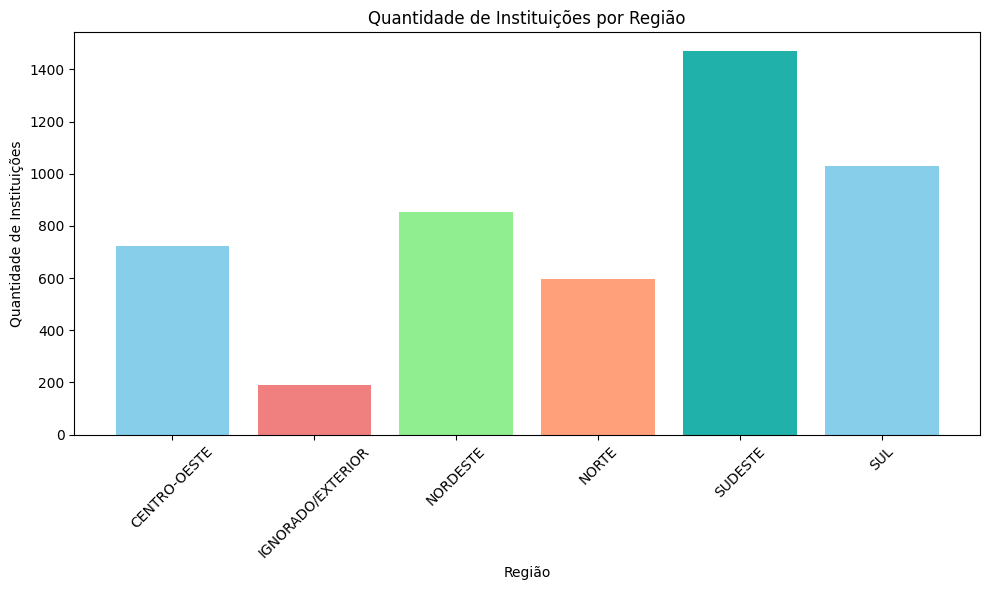

In [ ]:
tabela_comparativa_uf = tabela.groupby('UF')['NOME_CURSO'].nunique().reset_index()

tabela_comparativa_uf.columns = ['Região', 'Quantidade de Instituições']

print(tabela_comparativa_uf)



import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))


regioes = tabela_comparativa_regiao['Região']
quantidade_cursos = tabela_comparativa_regiao['Quantidade de Instituições']

cores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']


plt.bar(regioes, quantidade_cursos, color=cores)

plt.xlabel('Região')
plt.ylabel('Quantidade de Instituições')
plt.title('Quantidade de Instituições por Região')

plt.xticks(rotation=45)


plt.tight_layout()


plt.savefig('grafico_quantidade_instituicoes_por_regiao.png', dpi=300, bbox_inches='tight')


plt.show()


Filtrando por curso

Quantidade de cidades onde o curso está disponível: 1305
Quantidade de cidades por região que oferecem o curso:
REGIAO
CENTRO-OESTE         109
IGNORADO/EXTERIOR      1
NORDESTE             340
NORTE                121
SUDESTE              482
SUL                  261
Name: MUNICIPIO, dtype: int64
Quantidade de instituições que oferecem o curso por região:
REGIAO
CENTRO-OESTE         17
IGNORADO/EXTERIOR     2
NORDESTE             17
NORTE                12
SUDESTE              35
SUL                  24
Name: NOME_IES, dtype: int64


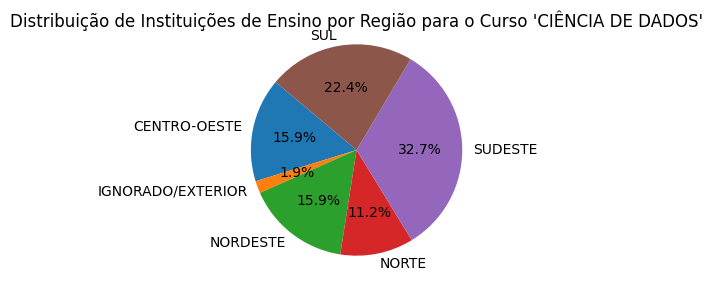

In [ ]:
curso_procurado = "CIÊNCIA DE DADOS"

curso_filtrado = tabela[tabela['NOME_CURSO'] == curso_procurado]

# Analisar a quantidade de cidades que oferecem o curso
cidades_do_curso = curso_filtrado['MUNICIPIO'].unique()
quantidade_de_cidades = len(cidades_do_curso)
print("Quantidade de cidades onde o curso está disponível:", quantidade_de_cidades)


# Analisar a quantidade de cidades por região que oferecem o curso
cidades_por_regiao = curso_filtrado.groupby('REGIAO')['MUNICIPIO'].nunique()

print("Quantidade de cidades por região que oferecem o curso:")
print(cidades_por_regiao)

# Analisar a quantidade de instituições de ensino por região que oferecem o curso
instituicoes_por_regiao = curso_filtrado.groupby(['REGIAO', 'NOME_IES'])['NOME_IES'].nunique().groupby('REGIAO').count()
print("Quantidade de instituições que oferecem o curso por região:")
print(instituicoes_por_regiao)


plt.figure(figsize=(3, 3))
plt.pie(instituicoes_por_regiao, labels=instituicoes_por_regiao.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribuição de Instituições de Ensino por Região para o Curso '{curso_procurado}'")
plt.axis('equal') 


plt.savefig('grafico_qt_instituicao_por_regiaoCD.png', dpi=300, bbox_inches='tight')

plt.show()